In [ ]:
import pickle
import numpy as np

# 피클 파일 경로
cbct_13_path = '/content/drive/MyDrive/TMJ OA/기존 MRI1,2 + NEW MRI1,2/tmj_oa_MRI1,2+NEW_dataset.pkl'
cbct_24_path = '/content/drive/MyDrive/TMJ OA/기존 MRI3,4 + NEW MRI3,4/tmj_oa_MRI3,4+NEW_dataset.pkl'

# 피클 파일 로드
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

# 두 피클 데이터 로드
cbct_13_data = load_pickle(cbct_13_path)
cbct_24_data = load_pickle(cbct_24_path)

# 데이터 비교
def compare_datasets(data1, data2):
    # 주요 키 비교
    keys1 = set(data1.keys())
    keys2 = set(data2.keys())
    print("Keys in CBCT 1,3 but not in CBCT 2,4:", keys1 - keys2)
    print("Keys in CBCT 2,4 but not in CBCT 1,3:", keys2 - keys1)

    # 데이터셋 구조 및 크기 비교
    for key in keys1.intersection(keys2):
        print(f"\nComparing key: {key}")
        sub_keys1 = set(data1[key].keys())
        sub_keys2 = set(data2[key].keys())
        print(f"  Subkeys in CBCT 1,3 but not in CBCT 2,4: {sub_keys1 - sub_keys2}")
        print(f"  Subkeys in CBCT 2,4 but not in CBCT 1,3: {sub_keys2 - sub_keys1}")

        for sub_key in sub_keys1.intersection(sub_keys2):
            print(f"    Subkey: {sub_key}")
            if isinstance(data1[key][sub_key], list) or isinstance(data1[key][sub_key], np.ndarray):
                print(f"      CBCT 1,3 size: {len(data1[key][sub_key])}")
                print(f"      CBCT 2,4 size: {len(data2[key][sub_key])}")
            else:
                print(f"      CBCT 1,3 value: {data1[key][sub_key]}")
                print(f"      CBCT 2,4 value: {data2[key][sub_key]}")

# 데이터 비교 수행
compare_datasets(cbct_13_data, cbct_24_data)

Keys in CBCT 1,3 but not in CBCT 2,4: set()
Keys in CBCT 2,4 but not in CBCT 1,3: set()

Comparing key: validation_data
  Subkeys in CBCT 1,3 but not in CBCT 2,4: set()
  Subkeys in CBCT 2,4 but not in CBCT 1,3: set()
    Subkey: side
      CBCT 1,3 size: 212
      CBCT 2,4 size: 212
    Subkey: label
      CBCT 1,3 size: 212
      CBCT 2,4 size: 212
    Subkey: image
      CBCT 1,3 size: 212
      CBCT 2,4 size: 212
    Subkey: patient_id
      CBCT 1,3 size: 212
      CBCT 2,4 size: 212

Comparing key: test_data
  Subkeys in CBCT 1,3 but not in CBCT 2,4: set()
  Subkeys in CBCT 2,4 but not in CBCT 1,3: set()
    Subkey: side
      CBCT 1,3 size: 215
      CBCT 2,4 size: 212
    Subkey: label
      CBCT 1,3 size: 215
      CBCT 2,4 size: 212
    Subkey: image
      CBCT 1,3 size: 215
      CBCT 2,4 size: 212
    Subkey: patient_id
      CBCT 1,3 size: 215
      CBCT 2,4 size: 212

Comparing key: train_data
  Subkeys in CBCT 1,3 but not in CBCT 2,4: set()
  Subkeys in CBCT 2,4 but not 

In [ ]:
# Patient ID 비교
cbct_13_ids = set(cbct_13_data['train_data']['patient_id'])
cbct_24_ids = set(cbct_24_data['train_data']['patient_id'])

# ID 차이 확인
print("Patient IDs in CBCT 1,3 but not in CBCT 2,4:", cbct_13_ids - cbct_24_ids)
print("Patient IDs in CBCT 2,4 but not in CBCT 1,3:", cbct_24_ids - cbct_13_ids)

Patient IDs in CBCT 1,3 but not in CBCT 2,4: {'14991037', '12896041', '12245828', '20678580', '11311623', '14964895', '11406306', '20674173', '20696432', '14954077', '20688272', '20689744', '12162509', '15027202', '12023769', '20693346', '20408035', '15024738', '14819190', '14893205', '20311607', '20460546', '12236503', '15021764', '20468772', '14722666', '12596683', '15024224', '14618558', '20505169', '14943271', '11325247', '20398175', '20680029', '20561691', '20680393', '15000285', '12702167', '11660540', '20685593', '14966086', '11415622', '11155418', '20458774', '20646746', '20696922', '20431284', '20692778', '20697900', '14967247', '20464254', '14622489', '20431634', '20681852', '20598750', '20694470', '14959181', '14664335', '14974393', '14970561', '14952950', '20464008', '11784940'}
Patient IDs in CBCT 2,4 but not in CBCT 1,3: {'20685952', '15023150', '14951891', '14431680', '15024112', '20123901', '20695032', '14741005', '14003185', '14966246', '14735026', '14986872', '2069317

In [ ]:
# 병합을 위한 공통 키 확인
merged_data = {'train_data': {}, 'validation_data': {}, 'test_data': {}}

for key in merged_data.keys():
    merged_data[key]['image'] = np.concatenate((cbct_13_data[key]['image'], cbct_24_data[key]['image']))
    merged_data[key]['label'] = np.concatenate((cbct_13_data[key]['label'], cbct_24_data[key]['label']))
    merged_data[key]['side'] = np.concatenate((cbct_13_data[key]['side'], cbct_24_data[key]['side']))
    merged_data[key]['patient_id'] = np.concatenate((cbct_13_data[key]['patient_id'], cbct_24_data[key]['patient_id']))

print("Merged data shapes:")
for key in merged_data.keys():
    print(f"{key}: {len(merged_data[key]['image'])} images")

Merged data shapes:
train_data: 1267 images
validation_data: 424 images
test_data: 427 images


In [ ]:
# 피클 파일 로드
with open('/content/drive/MyDrive/TMJ OA/기존 MRI1,2 + NEW MRI1,2/tmj_oa_MRI1,2+NEW_dataset.pkl', 'rb') as f1:
    cbct_13_data = pickle.load(f1)

with open('/content/drive/MyDrive/TMJ OA/기존 MRI3,4 + NEW MRI3,4/tmj_oa_MRI3,4+NEW_dataset.pkl', 'rb') as f2:
    cbct_24_data = pickle.load(f2)

# 데이터 병합
merged_data = {}

for key in cbct_13_data.keys():  # train_data, validation_data, test_data
    merged_data[key] = {}
    for subkey in cbct_13_data[key].keys():  # image, label, patient_id, side
        if isinstance(cbct_13_data[key][subkey], np.ndarray):
            # 배열 데이터 병합
            merged_data[key][subkey] = np.concatenate([cbct_13_data[key][subkey], cbct_24_data[key][subkey]])
        else:
            # 리스트 데이터 병합
            merged_data[key][subkey] = cbct_13_data[key][subkey] + cbct_24_data[key][subkey]

# 병합된 데이터 정보 출력
for key, value in merged_data.items():
    print(f"{key}:")
    for subkey, subvalue in value.items():
        print(f"  {subkey} - Size: {len(subvalue)}")

# 병합된 데이터를 새 피클 파일로 저장
output_path = '/content/drive/MyDrive/TMJ OA/NEW_MRI1,2,3,4_Merged_dataset.pkl'
with open(output_path, 'wb') as f:
    pickle.dump(merged_data, f)

print(f"CBCT 1,3 and 2,4 datasets merged and saved to {output_path}")

train_data:
  image - Size: 1267
  patient_id - Size: 1267
  side - Size: 1267
  label - Size: 1267
validation_data:
  image - Size: 424
  patient_id - Size: 424
  side - Size: 424
  label - Size: 424
test_data:
  image - Size: 427
  patient_id - Size: 427
  side - Size: 427
  label - Size: 427
CBCT 1,3 and 2,4 datasets merged and saved to /content/drive/MyDrive/TMJ OA/NEW_MRI1,2,3,4_Merged_dataset.pkl


Class weights: {0: 0.6062200956937799, 1: 2.8536036036036037}
Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 304ms/step - accuracy: 0.5557 - auc: 0.6000 - loss: 0.8109 - val_accuracy: 0.1675 - val_auc: 0.5000 - val_loss: 8.4383 - learning_rate: 1.0000e-04
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - accuracy: 0.6140 - auc: 0.7450 - loss: 0.6273 - val_accuracy: 0.8325 - val_auc: 0.7184 - val_loss: 0.6695 - learning_rate: 1.0000e-04
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.6202 - auc: 0.7718 - loss: 0.5939 - val_accuracy: 0.1675 - val_auc: 0.5000 - val_loss: 15.1077 - learning_rate: 1.0000e-04
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.6567 - auc: 0.8294 - loss: 0.5282 - val_accuracy: 0.8325 - val_auc: 0.5000 - val_loss: 3.4931 - learning_rate: 1.0000e-04
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.7149 - auc: 0.8855 - loss: 0.4813 - val_accuracy: 0.8325 - val_auc: 0.5000 - val_loss: 2.1553 - learning_rate: 5.000

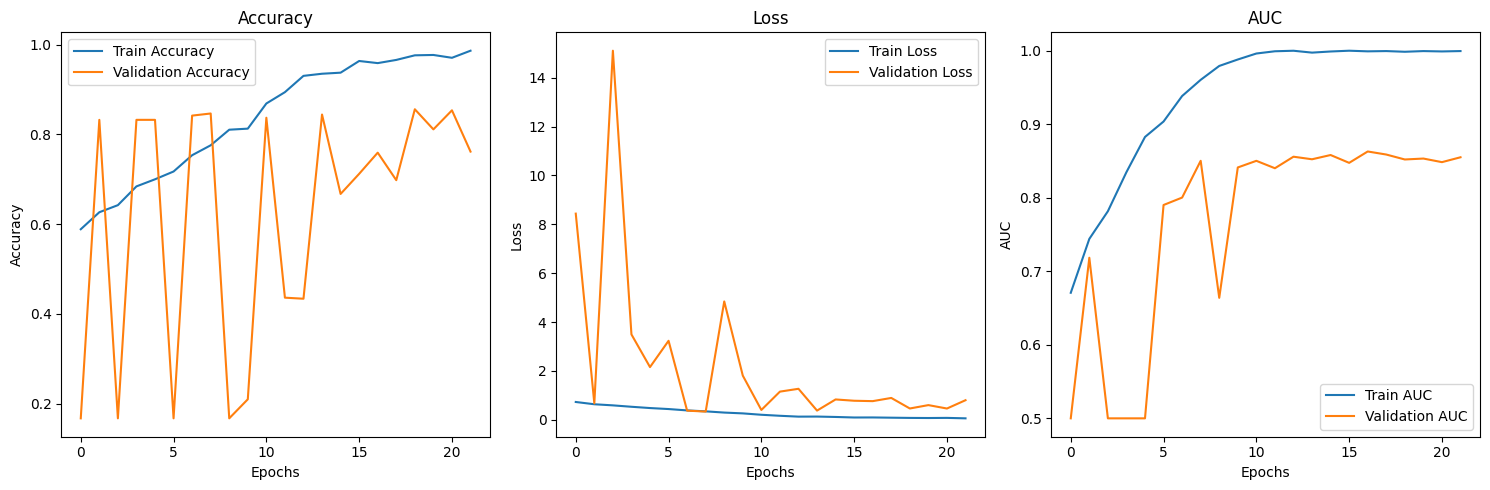

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.7505 - auc: 0.7823 - loss: 0.7623
Test - Loss: 0.6878, Accuracy: 0.7635, AUC: 0.8897
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
Optimal Threshold: 0.7436


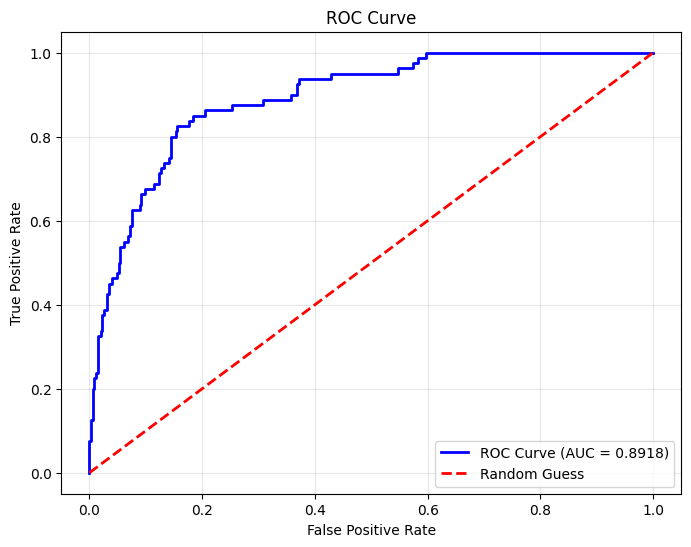

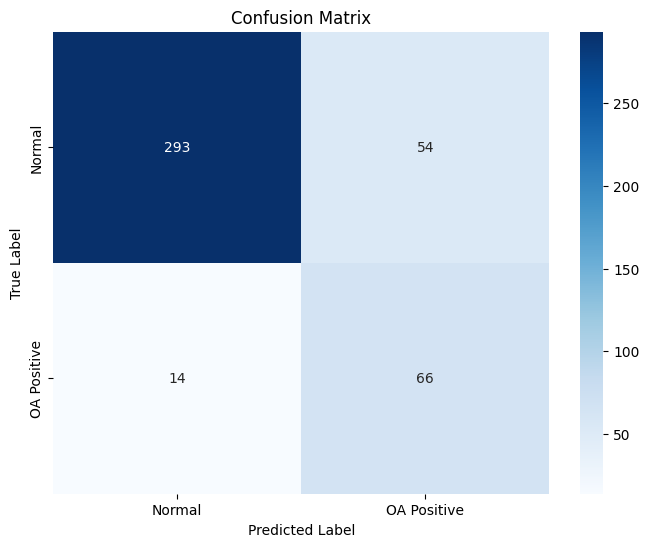

Confusion Matrix:
 [[293  54]
 [ 14  66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.90       347
           1       0.55      0.82      0.66        80

    accuracy                           0.84       427
   macro avg       0.75      0.83      0.78       427
weighted avg       0.88      0.84      0.85       427



In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from tensorflow.image import resize

# 병합된 피클 파일 로드
with open('/content/drive/MyDrive/TMJ OA/NEW_MRI1,2,3,4_Merged_dataset.pkl', 'rb') as f:
    merged_data = pickle.load(f)

# 병합된 데이터 불러오기
train_images = merged_data['train_data']['image']
train_labels = merged_data['train_data']['label']
val_images = merged_data['validation_data']['image']
val_labels = merged_data['validation_data']['label']
test_images = merged_data['test_data']['image']
test_labels = merged_data['test_data']['label']

# 데이터 증강 생성기 설정
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect'
)

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)


# 데이터 스케일링
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# VGG16 모델 구성
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(140, 140, 3))
for layer in base_model.layers[:-12]:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# 클래스 가중치 계산
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# 콜백 설정
early_stopping = EarlyStopping(monitor='val_auc', patience=5, mode='max', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('merged_model.keras', save_best_only=True, monitor='val_auc', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=2, mode='max', min_lr=1e-6)

# 모델 학습
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=30,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# 학습 결과 시각화
plt.figure(figsize=(15, 5))

# 정확도
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# AUC
plt.subplot(1, 3, 3)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

# 테스트 데이터 평가
test_loss, test_accuracy, test_auc = model.evaluate(test_images, test_labels)
print(f"Test - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}, AUC: {test_auc:.4f}")

# ROC Curve
y_pred = model.predict(test_images).flatten()
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Confusion Matrix
y_pred_adjusted = (y_pred >= optimal_threshold).astype(int)
#y_pred_adjusted = (y_pred >= 0.4).astype(int)  # 임계값을 약간 높임
conf_matrix = confusion_matrix(test_labels, y_pred_adjusted)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "OA Positive"], yticklabels=["Normal", "OA Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(test_labels, y_pred_adjusted))